### Загрузка пакетов

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [13]:
churn_df = pd.read_csv("telecom_churn_clean.csv")
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим переменные на целевую и независимые

In [14]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values
print(X)

[[128   1]
 [107   1]
 [137   0]
 ...
 [ 28   2]
 [184   2]
 [ 74   0]]


### Построение классификатора

In [15]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Создание набора для тестирования

In [17]:
X_new = np.array([
    [30, 17.5],
    [107.0, 24.1],
    [213.0, 10.9]]
)

### Предсказание

In [19]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0]


### Разбитие данных

In [26]:
from sklearn.model_selection import train_test_split
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)


### Обучение и предсказание

In [27]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8590704647676162


### Создание множеств соседей

In [35]:
neighbors = np.arange(1,30)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, "\n", train_accuracies, "\n", test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 {1: 1.0, 2: 0.8882220555138785, 3: 0.8983495873968492, 4: 0.8780945236309077, 5: 0.8818454613653414, 6: 0.8675918979744937, 7: 0.8735933983495874, 8: 0.8642160540135033, 9: 0.8672168042010503, 10: 0.8608402100525131, 11: 0.8645911477869468, 12: 0.8593398349587397, 13: 0.8619654913728432, 14: 0.859714928732183, 15: 0.8612153038259565, 16: 0.8578394598649662, 17: 0.8589647411852963, 18: 0.8567141785446362, 19: 0.8582145536384096, 20: 0.8563390847711928, 21: 0.8570892723180795, 22: 0.8559639909977494, 23: 0.8563390847711928, 24: 0.8555888972243061, 25: 0.8555888972243061, 26: 0.8555888972243061, 27: 0.8555888972243061, 28: 0.8555888972243061, 29: 0.8555888972243061} 
 {1: 0.8035982008995503, 2: 0.8515742128935532, 3: 0.8440779610194903, 4: 0.8575712143928036, 5: 0.863568215892054, 6: 0.8590704647676162, 7: 0.8545727136431784, 8: 0.8530734632683659, 9: 0.8545727136431784, 10: 0.8530734632683659, 11:

### Оценка модели от количества соседей

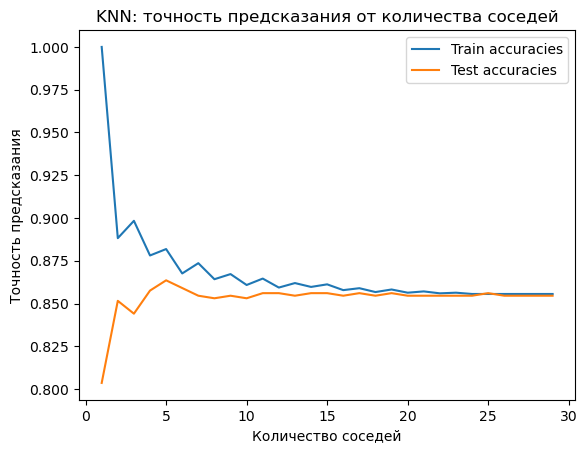

In [41]:
plt.title("KNN: точность предсказания от количества соседей")
plt.plot(neighbors, train_accuracies.values(), label = "Train accuracies")
plt.plot(neighbors, test_accuracies.values(), label = "Test accuracies")
plt.legend()
plt.xlabel("Количество соседей")
plt.ylabel("Точность предсказания")
plt.show()

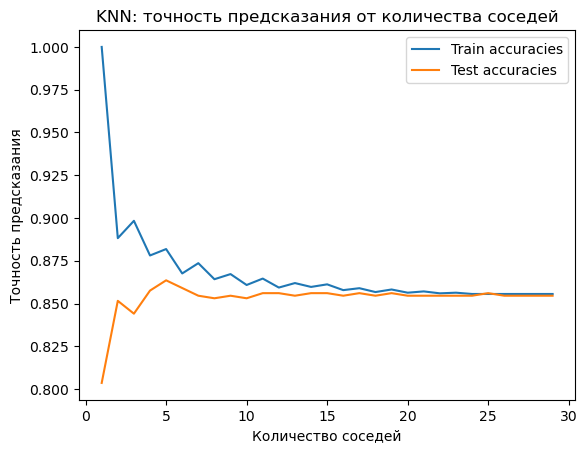

In [42]:
plt.title("KNN: точность предсказания от количества соседей")
plt.plot(neighbors, train_accuracies.values(), label = "Train accuracies")
plt.plot(neighbors, test_accuracies.values(), label = "Test accuracies")
plt.legend()
plt.xlabel("Количество соседей")
plt.ylabel("Точность предсказания")
plt.show()